In [1]:
from zipfile import ZipFile

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00486/rice_leaf_diseases.zip

--2020-09-09 14:23:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/00486/rice_leaf_diseases.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38442567 (37M) [application/x-httpd-php]
Saving to: ‘rice_leaf_diseases.zip’

rice_leaf_diseases. 100%[===================>]  36.66M  14.5MB/s    in 2.5s    

2020-09-09 14:24:01 (14.5 MB/s) - ‘rice_leaf_diseases.zip’ saved [38442567/38442567]



In [2]:
!mkdir path
with ZipFile('rice_leaf_diseases.zip','r') as zip:
  zip.extractall(path='path/')

In [3]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 2.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
from fastai.vision.all import *

In [5]:
diseases = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))


In [6]:
dls = diseases.dataloaders('path')

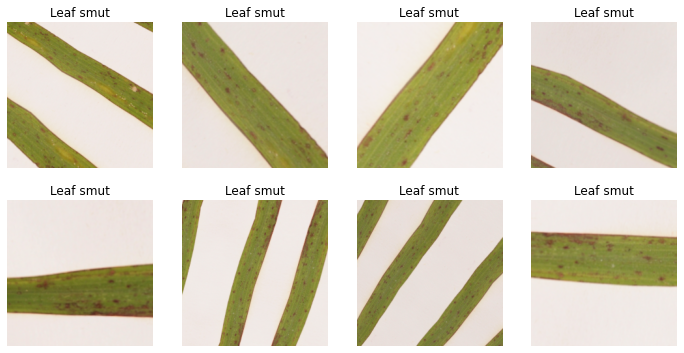

In [79]:
diseases = diseases.new(item_tfms=Resize(224),
                        batch_tfms=aug_transforms(min_zoom=0.3,flip_vert=True,
                                                  max_rotate=90.0,max_warp=0.1)
                        )
dls = diseases.dataloaders('path')
dls.train.show_batch(max_n=8, nrows=2, unique=True)


In [85]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.00015848931798245758)

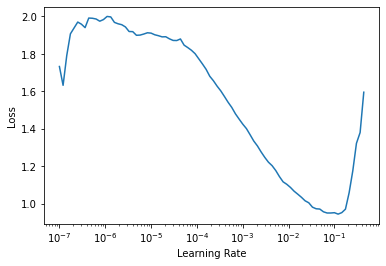

In [82]:
learn.lr_find()

In [86]:
learn.fine_tune(7,0.009)

epoch,train_loss,valid_loss,error_rate,time
0,2.058767,1.413745,0.541667,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.418376,2.502825,0.458333,00:06
1,1.187788,2.739353,0.583333,00:06
2,1.060850,3.446369,0.625000,00:06
3,1.079805,1.248093,0.250000,00:06
4,1.015928,0.841854,0.166667,00:06
5,0.998820,0.793609,0.166667,00:06
6,1.032472,0.684311,0.166667,00:06


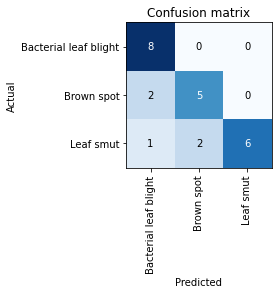

In [87]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [100]:
learn_inf = load_learner('drive/My Drive/export.pkl')

In [94]:
!wget https://upload.wikimedia.org/wikipedia/commons/9/9c/Cochliobolus_miyabeanus.jpg

--2020-09-09 15:57:20--  https://upload.wikimedia.org/wikipedia/commons/9/9c/Cochliobolus_miyabeanus.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 479274 (468K) [image/jpeg]
Saving to: ‘Cochliobolus_miyabeanus.jpg’

Cochliobolus_miyabe 100%[===================>] 468.04K  1.89MB/s    in 0.2s    

2020-09-09 15:57:21 (1.89 MB/s) - ‘Cochliobolus_miyabeanus.jpg’ saved [479274/479274]



In [103]:
learn_inf.predict('leaf_smut')

('Leaf smut', tensor(2), tensor([0.0445, 0.3911, 0.5644]))

In [104]:
from ipywidgets import widgets

In [109]:
from ipywidgets import VBox

In [107]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')


In [106]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [111]:
VBox([widgets.Label('Select rice disease image'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [112]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9MB 2.6MB/s 
     |████████████████████████████████| 921kB 25.4MB/s 
     |████████████████████████████████| 184kB 42.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
